In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

from sklearn.linear_model import ElasticNet
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [7]:
#I have defined the dat class in Data_prep.py code to get data from file and prepare for analysis
from Data_prep import dat

In [8]:
#In this  analysis we are using  Ames, Iowa dataset http://jse.amstat.org/v19n3/decock.pdf 
#we are trying to predict house prices based on differen features
datobj=dat("AMES_Final_DF.csv","SalePrice",0.1,101)
df=datobj.df

In [9]:
df.head()

,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,...,Sale Type_ConLw,Sale Type_New,Sale Type_Oth,Sale Type_VWD,Sale Type_WD,Sale Condition_AdjLand,Sale Condition_Alloca,Sale Condition_Family,Sale Condition_Normal,Sale Condition_Partial
0,141.0,31770,6,5,1960,1960,112.0,639.0,0.0,441.0,...,0,0,0,0,1,0,0,0,1,0
1,80.0,11622,5,6,1961,1961,0.0,468.0,144.0,270.0,...,0,0,0,0,1,0,0,0,1,0
2,81.0,14267,6,6,1958,1958,108.0,923.0,0.0,406.0,...,0,0,0,0,1,0,0,0,1,0
3,93.0,11160,7,5,1968,1968,0.0,1065.0,0.0,1045.0,...,0,0,0,0,1,0,0,0,1,0
4,74.0,13830,5,5,1997,1998,0.0,791.0,0.0,137.0,...,0,0,0,0,1,0,0,0,1,0


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2925 entries, 0 to 2924
Columns: 274 entries, Lot Frontage to Sale Condition_Partial
dtypes: float64(11), int64(263)
memory usage: 6.1 MB


In [11]:
df.describe()

,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,...,Sale Type_ConLw,Sale Type_New,Sale Type_Oth,Sale Type_VWD,Sale Type_WD,Sale Condition_AdjLand,Sale Condition_Alloca,Sale Condition_Family,Sale Condition_Normal,Sale Condition_Partial
count,2925.000000,2925.000000,2925.000000,2925.000000,2925.000000,2925.000000,2925.000000,2925.000000,2925.000000,2925.000000,...,2925.000000,2925.000000,2925.000000,2925.000000,2925.000000,2925.000000,2925.000000,2925.000000,2925.000000,2925.000000
mean,69.683099,10109.861538,6.091624,5.563761,1971.323761,1984.229060,100.318632,438.974359,49.790427,558.959316,...,0.002735,0.080684,0.002393,0.000342,0.866325,0.004103,0.007863,0.015726,0.824615,0.082735
std,21.344161,7785.509739,1.406386,1.112262,30.228826,20.857822,176.667803,439.426274,169.274143,439.729905,...,0.052235,0.272395,0.048870,0.018490,0.340361,0.063931,0.088341,0.124437,0.380361,0.275528
min,0.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,60.000000,7438.000000,5.000000,5.000000,1954.000000,1965.000000,0.000000,0.000000,0.000000,218.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,70.000000,9430.000000,6.000000,5.000000,1973.000000,1993.000000,0.000000,370.000000,0.000000,465.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,80.000000,11526.000000,7.000000,6.000000,2000.000000,2004.000000,162.000000,734.000000,0.000000,801.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,2288.000000,1526.000000,2336.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [210]:
df_corr=df.corr()
df_corr["SalePrice"].nsmallest(1)

Exter Qual_TA   -0.591459
Name: SalePrice, dtype: float64

In [211]:
df_corr["SalePrice"].nlargest(2)
#Saleprice has the biggest correlation with Overall Qual feature

SalePrice       1.000000
Overall Qual    0.802637
Name: SalePrice, dtype: float64

<Axes: xlabel='Overall Qual', ylabel='SalePrice'>

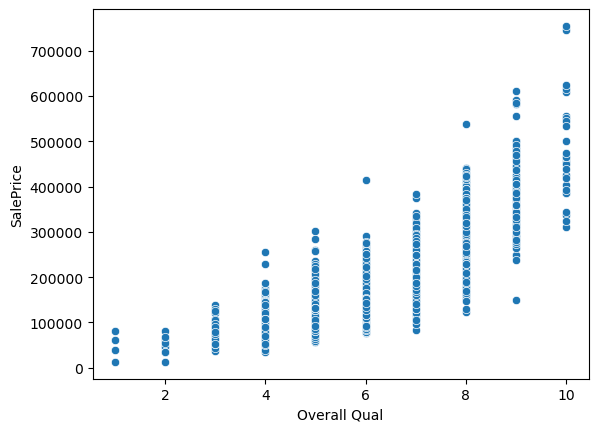

In [212]:
#The highest correlation of "SalePrice" is with "Overall Qual" feature
sns.scatterplot(data=df,y="SalePrice",x="Overall Qual")

C:\Users\17573\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


(array([-100000.,       0.,  100000.,  200000.,  300000.,  400000.,
         500000.,  600000.,  700000.,  800000.]),
 [Text(-100000.0, 0, '−100000'),
  Text(0.0, 0, '0'),
  Text(100000.0, 0, '100000'),
  Text(200000.0, 0, '200000'),
  Text(300000.0, 0, '300000'),
  Text(400000.0, 0, '400000'),
  Text(500000.0, 0, '500000'),
  Text(600000.0, 0, '600000'),
  Text(700000.0, 0, '700000'),
  Text(800000.0, 0, '800000')])

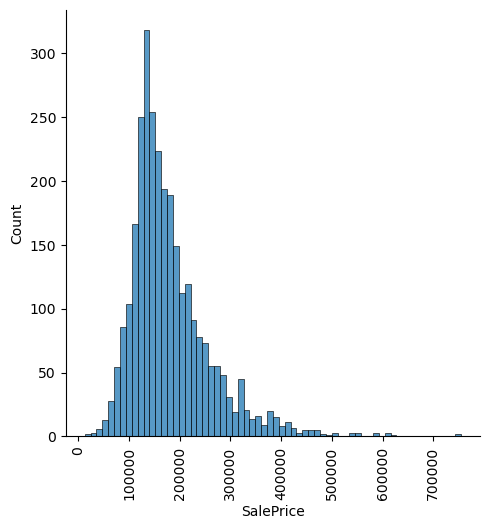

In [213]:
# This is how the distribution of SalePrice looks like
sns.displot(df["SalePrice"])
plt.xticks(rotation=90)

In [12]:
# Split data into training and test samples and Scale feature data using Standard Scaler
datobj.scale_dat()
X_train=datobj.X_train
X_test=datobj.X_test
y_train=datobj.y_train
y_test=datobj.y_test

In [215]:
#Create an insatnce of ElasticNet model
el_model=ElasticNet()

In [216]:
#Dictionary of model parameters to be used in GridSearch
par_dict={"alpha":[100,10,0.1,0.01],"l1_ratio":[1,0.75,0.5,0.25,0]}

In [217]:
#Creating a GridSearchCV object and fitting training data with linear regression ElasticNet model
grid_model=GridSearchCV( estimator=el_model,param_grid=par_dict,scoring="neg_mean_squared_error", cv=5,verbose=1)
grid_model.fit(X_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


C:\Users\17573\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.056e+12, tolerance: 1.355e+09 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
C:\Users\17573\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.845e+12, tolerance: 1.308e+09 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linea

GridSearchCV(cv=5, estimator=ElasticNet(),
             param_grid={'alpha': [100, 10, 0.1, 0.01],
                         'l1_ratio': [1, 0.75, 0.5, 0.25, 0]},
             scoring='neg_mean_squared_error', verbose=1)

In [218]:
#Display fit results
grid_model.best_estimator_

ElasticNet(alpha=100, l1_ratio=1)

In [219]:
grid_model.best_params_

{'alpha': 100, 'l1_ratio': 1}

In [220]:
#To see fifferent fit results
df_fitresults=pd.DataFrame(grid_model.cv_results_)

In [221]:
df_fitresults

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,param_l1_ratio,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.144410,1.531898e-02,0.001001,6.135469e-06,100,1,"{'alpha': 100, 'l1_ratio': 1}",-6.527522e+08,-5.774424e+08,-3.762401e+08,-3.950646e+08,-5.724653e+08,-5.147929e+08,1.093760e+08,1
1,0.010972,6.330894e-04,0.000597,4.877251e-04,100,0.75,"{'alpha': 100, 'l1_ratio': 0.75}",-3.621710e+09,-4.294668e+09,-2.769214e+09,-2.554993e+09,-3.681866e+09,-3.384490e+09,6.387111e+08,17
2,0.010572,7.980710e-04,0.000399,4.885194e-04,100,0.5,"{'alpha': 100, 'l1_ratio': 0.5}",-4.678476e+09,-5.443283e+09,-3.724350e+09,-3.426008e+09,-4.796636e+09,-4.413750e+09,7.385833e+08,18
3,0.009973,3.162980e-07,0.000000,0.000000e+00,100,0.25,"{'alpha': 100, 'l1_ratio': 0.25}",-5.216076e+09,-6.018996e+09,-4.215552e+09,-3.879745e+09,-5.359471e+09,-4.937968e+09,7.829880e+08,19
4,0.372405,1.843992e-02,0.000997,9.702201e-07,100,0,"{'alpha': 100, 'l1_ratio': 0}",-5.540185e+09,-6.363962e+09,-4.513142e+09,-4.156221e+09,-5.697581e+09,-5.254218e+09,8.080435e+08,20
5,0.287644,2.073873e-02,0.001189,3.842831e-04,10,1,"{'alpha': 10, 'l1_ratio': 1}",-6.672342e+08,-5.937499e+08,-3.809313e+08,-4.127535e+08,-5.900095e+08,-5.289357e+08,1.117685e+08,6
6,0.020744,3.959360e-03,0.000997,2.780415e-07,10,0.75,"{'alpha': 10, 'l1_ratio': 0.75}",-1.215277e+09,-1.459598e+09,-7.019488e+08,-7.373118e+08,-1.111692e+09,-1.045165e+09,2.890291e+08,13
7,0.013963,8.920700e-04,0.000998,3.504023e-07,10,0.5,"{'alpha': 10, 'l1_ratio': 0.5}",-1.638794e+09,-2.008322e+09,-1.042129e+09,-1.032572e+09,-1.560973e+09,-1.456558e+09,3.741851e+08,14
8,0.014761,2.705740e-03,0.000598,4.884610e-04,10,0.25,"{'alpha': 10, 'l1_ratio': 0.25}",-2.001145e+09,-2.449810e+09,-1.346547e+09,-1.295691e+09,-1.949264e+09,-1.808491e+09,4.346445e+08,15
9,0.408703,5.130871e-02,0.000995,3.339903e-06,10,0,"{'alpha': 10, 'l1_ratio': 0}",-2.317916e+09,-2.823417e+09,-1.618475e+09,-1.532325e+09,-2.289471e+09,-2.116321e+09,4.815617e+08,16


In [222]:
#Test model

In [223]:
y_test_pred=grid_model.predict(X_test)

In [224]:
mean_absolute_error(y_test,y_test_pred)

14195.354900562168

In [225]:
np.sqrt(mean_squared_error(y_test,y_test_pred))

20558.508566893157

In [226]:
# we get MAE of $14195 and RMSE of $20558

In [227]:
y_test_list=y_test.tolist()

In [228]:
residuals=[y_test_pred[i]-y_test_list[i] for i in range(0,len(y_test_list))]

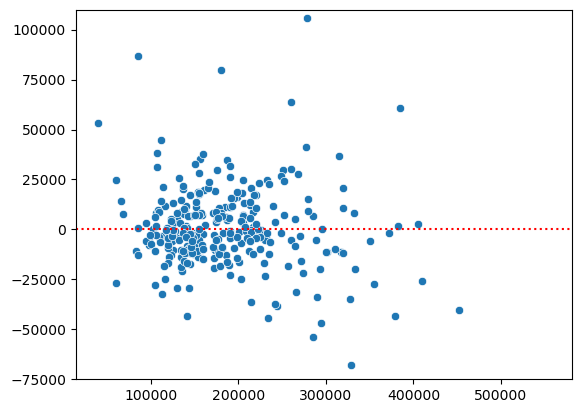

In [229]:
#Checking Homoscedasticity
sns.scatterplot(x=y_test_list,y=residuals)
plt.ylim(-75000,110000)
plt.axhline(y=0,color='r',linestyle=':')
# Tthere is no difference between variations in one part of 
#the data and the other

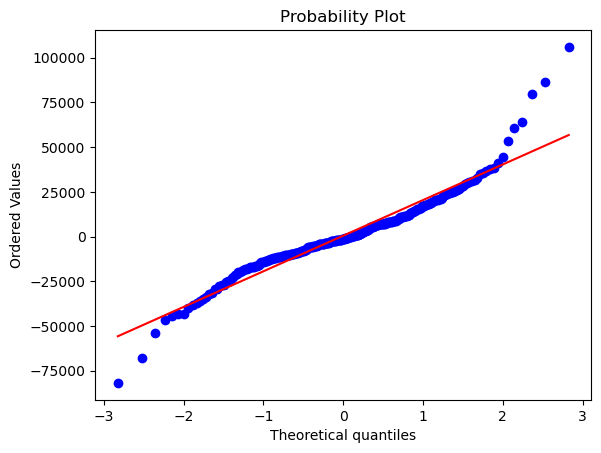

In [230]:
#Checking Normality

stats.probplot(residuals, dist="norm", plot=plt)
plt.show()

#distribution is normal since points lie approximately at 45 degree reference line